# Covid-19 - Brasil
## Redes Complexas - 2020/1
Alunos: Johnny Gomes
        e o Nomeriano Neto

In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Entendimento dos dados a partir de graficos e outros indicadores 

In [2]:
from bokeh.plotting import figure, output_file, show

In [3]:
print(nx.__version__)

2.4


In [4]:
# lê info regionais - divididos por estados, inclusive
df = pd.read_csv("./data/covid_regioes.csv")
df.sample(5)

,regiao,estado,coduf,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
706,Nordeste,PI,22,12/05/20,20,1443,111,49,4
1813,Sul,PR,41,25/05/20,22,3331,119,156,3
2277,Centro-Oeste,DF,53,23/03/20,13,133,16,0,0
145,Norte,AC,12,22/05/20,21,3343,240,80,2
1468,Sudeste,ES,32,30/03/20,14,72,12,0,0


In [10]:
# le dados a partir do pandas dataframe:
G = nx.from_pandas_edgelist(df, source='regiao', target='estado')


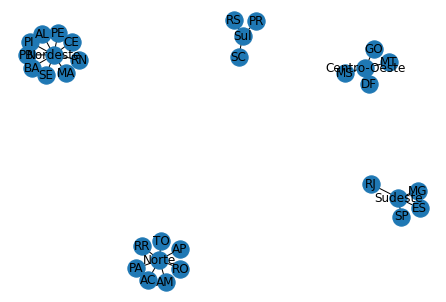

In [11]:
nx.draw(G, with_labels=True)

In [12]:
# 1 - pegar total de casos de cada estado dinamicamente:


In [21]:
# atribui cor e diametro diferenciado para nos-regioes:
G.add_node('Norte', dim= 'regiao',
                    totalCasos = 0,
                    totalMortes = 0)
G.add_node('Nordeste', dim= 'regiao',
                    totalCasos = 0,
                    totalMortes = 0)
G.add_node('Centro-Oeste', dim= 'regiao',
                    totalCasos = 0,
                    totalMortes = 0)
G.add_node('Sudeste', dim= 'regiao',
                    totalCasos = 0,
                    totalMortes = 0)
G.add_node('Sul', dim= 'regiao',
                    totalCasos = 0,
                    totalMortes = 0)

In [22]:
# 2 - cria grafo a partir da distribuicao geografica das regioes:
G.add_edges_from(
    [('Norte', 'Nordeste'), ('Norte', 'Centro-Oeste'), ('Nordeste', 'Centro-Oeste'), ('Nordeste', 'Sudeste'),
     ('Centro-Oeste', 'Sudeste'),('Centro-Oeste', 'Sul'), ('Sudeste', 'Sul')])

#G.nodes(data=True)

NodeDataView({'Norte': {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0}, 'RO': {}, 'AC': {}, 'AM': {}, 'RR': {}, 'PA': {}, 'AP': {}, 'TO': {}, 'Nordeste': {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0}, 'MA': {}, 'PI': {}, 'CE': {}, 'RN': {}, 'PB': {}, 'PE': {}, 'AL': {}, 'SE': {}, 'BA': {}, 'Sudeste': {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0}, 'MG': {}, 'ES': {}, 'RJ': {}, 'SP': {}, 'Sul': {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0}, 'PR': {}, 'SC': {}, 'RS': {}, 'Centro-Oeste': {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0}, 'MS': {}, 'MT': {}, 'GO': {}, 'DF': {}})

In [58]:
color_map = []
for node in G.nodes(data=True):
    if (node[1]):
#         print(node[1][1])
        color_map.append('blue')
    else: 
        color_map.append('green')

        

KeyError: 'dim'

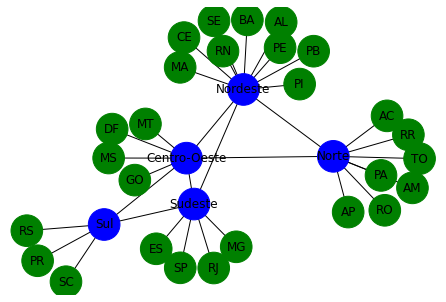

In [56]:
# 2.2.1 - ver a estrutura do grafo:
nx.draw(G, node_color=color_map, node_size=1000, with_labels=True)

In [ ]:
# 3 - atribuir numero de casos/mortes a cada nó-estado:


In [ ]:
# 4 - somar valores dos nós-estado e atribuir a sua respectiva regiao:


In [ ]:
# 5 - O diametro do nó é relativo ao numero de casos (usar interpolador entre o menor e maior numero):


In [ ]:
# 6 - animar o grafo e adicionar 'hover' com informacoes de numero de casos/mortes e/ou outras:


In [ ]:
# grafico do crescimento de novos casos ao longos das semanas (estado == 'TO')
sns.relplot(x="semanaEpi", y="casosNovos",
            sizes=(60, 600), alpha=.5, size='casosAcumulado', palette="muted",
            height=6, data=casos_TO)

In [ ]:
# grafico do crescimento de novos casos ao longos das semanas (estado == 'AM')
sns.relplot(x="semanaEpi", y="casosNovos",
            sizes=(60, 600), alpha=.5, size='casosNovos', palette="muted",
            height=6, data=casos_AM)

In [ ]:
# pega total de casos acumulados no Tocantins:
casos_TO.casosAcumulado[-1:]

In [ ]:
casos_TO.data

### Documentacao do processo - Pipeline da Produção da Rede Covid-19 - Brasil


Obs.: Esse _pipeline_ foi desenvolvido para trabalhos na área de **Descoberta de Conhecimento**, entretanto a certo ponto os passos bem definidos podem ajudar na compreensão e tratamento dos dados e posterior obtenção e apresentação do conhecimento obtido.

mais informações em: [KDD - Descoberta de Conhecimento em Bases de Dados](https://lume.ufrgs.br/handle/10183/8968)

### 1. Entendimento do dominio da aplicação:

Estudamos sobre Covid-19 e sobre a propagacao do virus pelo mundo

### 2. Criação da base de dados de interesse:

A base de dados foi criada por orgao federal e disponibilizada em:
[Saúde.Gov](https://covid.saude.gov.br/) mais informacoes em [SUS Analítico](https://susanalitico.saude.gov.br/)

### 3. Limpeza de dados e pré processamento:

#### 3.a) Limpeza dos dados:

Dividimos a base original em tres arquivos contendo: 
    1. Dados gerais do pais;
    2. Dados regionais;
    3. Dados estaduais e municipais;
    
Algumas colunas se fizeram desnecessarias, como o numero de habitantes em cada uma dessas microregioes por isso, foram descartadas da base em que trabalhamos.

#### 3.b) Integração dos dados:

Nao houve integracao de dados novos ou externos à base já existente.

#### 3.c) Transformação dos dados:

### 4. Redução e Projeção de Dados:

### 5. Escolha das funções de mineração:

### 6. Escolha dos algoritmos de mineração:

### 7. Mineração:

### 8. Interpretação dos dados:

### 9. Utilização/Publicação/Compartilhamento do conhecimento descoberto: